<a href="https://colab.research.google.com/github/Darshini-A/Data-Science-1/blob/main/Data%20visualization%20by%20Matplotlib%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [26]:
df_meal = pd.read_csv('/meal_info.csv') 
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [27]:
df_center = pd.read_csv('/fulfilment_center_info.csv') 
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [28]:
df_food = pd.read_csv('/train.csv') 
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [29]:
df = pd.merge(df_food,df_center,on='center_id') 
df = pd.merge(df,df_meal,on='meal_id')

In [30]:
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


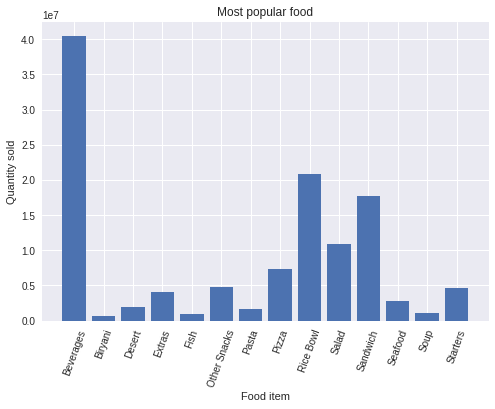

In [31]:
plt.bar(table.index,table['num_orders'])
plt.xticks(rotation=70) 
plt.xlabel('Food item') 
plt.ylabel('Quantity sold') 
plt.title('Most popular food') 
#plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_6.png',dpi=300,bbox_inches='tight')
plt.show();

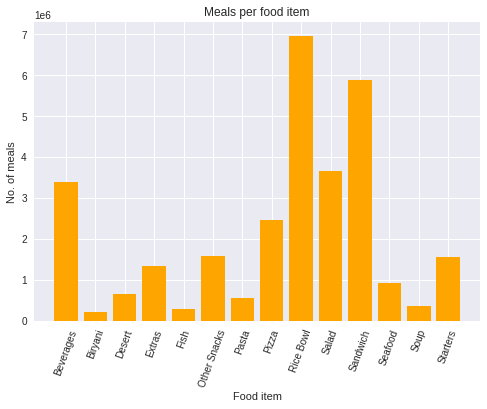

In [32]:
item_count = {}
for i in range(table.index.nunique()):
    item_count[table.index[i]] = table.num_orders[i]/df_meal[df_meal['category']==table.index[i]].shape[0]
plt.bar([x for x in item_count.keys()],[x for x in item_count.values()],color='orange')
plt.xticks(rotation=70)
plt.xlabel('Food item')
plt.ylabel('No. of meals')
plt.title('Meals per food item')
#plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_7.png',dpi=300,bbox_inches='tight')
plt.show();

In [33]:
d_cuisine = {}
total = df['num_orders'].sum()
for i in range(df['cuisine'].nunique()):
  c = df['cuisine'].unique()[i]
  c_order = df[df['cuisine']==c]['num_orders'].sum()
  d_cuisine[c] = c_order/total

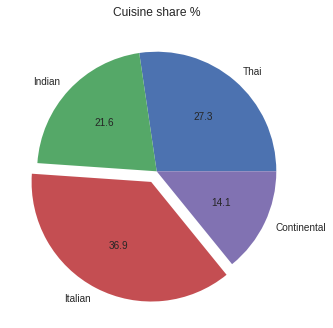

In [34]:
plt.pie([x*100 for x in d_cuisine.values()],labels=[x for x in d_cuisine.keys()],autopct='%0.1f',explode=[0,0,0.1,0]) 
plt.title('Cuisine share %') 
#plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_8.png',dpi=300,bbox_inches='tight') 
plt.show();

In [35]:
c_price = {}
for i in df['cuisine'].unique():
    c_price[i] = df[df['cuisine']==i].base_price

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


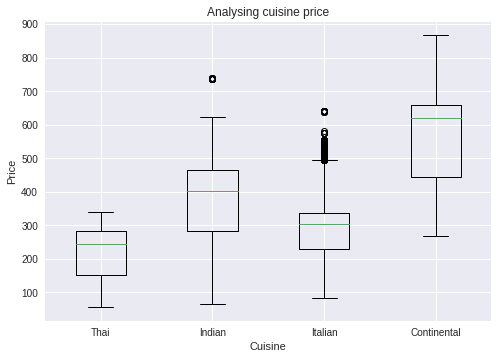

In [36]:
plt.boxplot([x for x in c_price.values()],labels=[x for x in c_price.keys()]) 
plt.xlabel('Cuisine') 
plt.ylabel('Price') 
plt.title('Analysing cuisine price') 
#plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_9.png',dpi=300,bbox_inches='tight') 
plt.show();

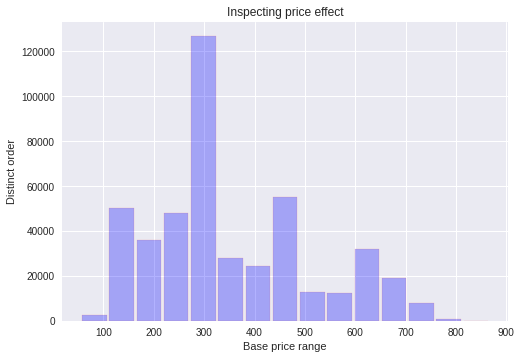

In [37]:
plt.hist(df['base_price'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 
plt.xlabel('Base price range') 
plt.ylabel('Distinct order') 
plt.title('Inspecting price effect') 
#plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_10.png',dpi=300,bbox_inches='tight') 
plt.show();

In [38]:
df['revenue'] = df.apply(lambda x: x.checkout_price*x.num_orders,axis=1) 
df['month'] = df['week'].apply(lambda x: x//4) 

month=[] 
month_order=[] 

for i in range(max(df['month'])):
    month.append(i) 
    month_order.append(df[df['month']==i].revenue.sum()) 

week=[] 
week_order=[] 

for i in range(max(df['week'])): 
    week.append(i) 
    week_order.append(df[df['week']==i].revenue.sum())

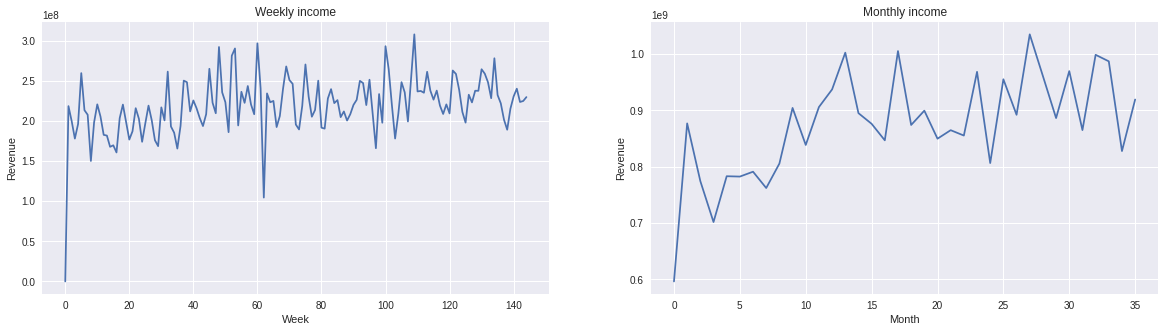

In [39]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5)) 

ax[0].plot(week,week_order) 
ax[0].set_xlabel('Week') 
ax[0].set_ylabel('Revenue') 
ax[0].set_title('Weekly income') 

ax[1].plot(month,month_order) 
ax[1].set_xlabel('Month') 
ax[1].set_ylabel('Revenue') 
ax[1].set_title('Monthly income') 

#plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_11.png',dpi=300,bbox_inches='tight') 
plt.show();

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


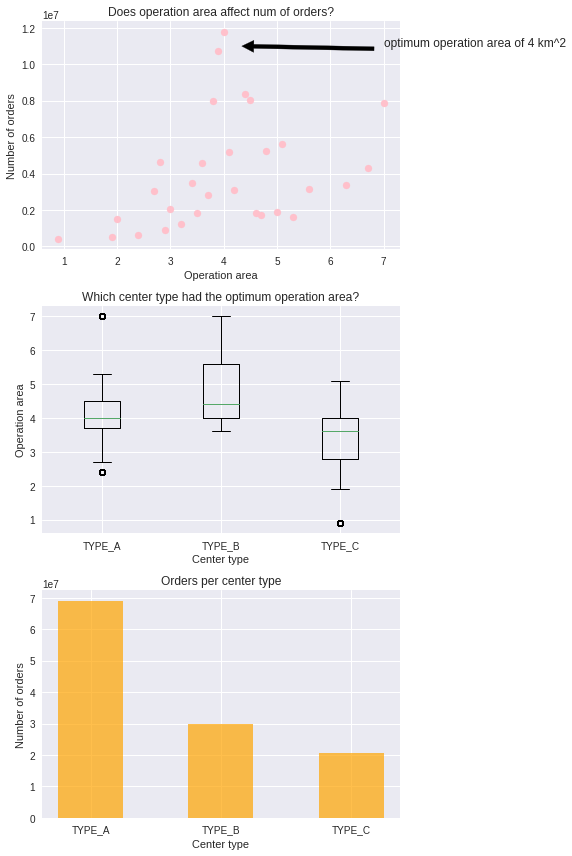

In [40]:
center_type_name = ['TYPE_A','TYPE_B','TYPE_C'] 

op_table=pd.pivot_table(df,index='op_area',values='num_orders',aggfunc=np.sum) 

c_type = {} 
for i in center_type_name: 
    c_type[i] = df[df['center_type']==i].op_area 

center_table=pd.pivot_table(df,index='center_type',values='num_orders',aggfunc=np.sum) 

fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,12)) 

ax[0].scatter(op_table.index,op_table['num_orders'],color='pink') 
ax[0].set_xlabel('Operation area') 
ax[0].set_ylabel('Number of orders') 
ax[0].set_title('Does operation area affect num of orders?') 
ax[0].annotate('optimum operation area of 4 km^2',xy=(4.2,1.1*10**7),xytext=(7,1.1*10**7),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=12) 

ax[1].boxplot([x for x in c_type.values()], labels=[x for x in c_type.keys()]) 
ax[1].set_xlabel('Center type') 
ax[1].set_ylabel('Operation area') 
ax[1].set_title('Which center type had the optimum operation area?') 

ax[2].bar(center_table.index,center_table['num_orders'],alpha=0.7,color='orange',width=0.5) 
ax[2].set_xlabel('Center type') 
ax[2].set_ylabel('Number of orders') 
ax[2].set_title('Orders per center type') 

plt.tight_layout() 
#plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_12.png',dpi=300,bbox_inches='tight') 
plt.show();